In [1]:
import cv2

In [2]:
# reading image, it will give us 3 * 3 matrix of image in pixel
img = cv2.imread('dataset/with mask/0-with-mask.jpg')

In [3]:
# shape gave us 3 output, hight, width, color channel 
img.shape

(350, 525, 3)

In [4]:
# first row of image
print(img[0])

[[38 66 60]
 [35 63 57]
 [32 59 50]
 ...
 [11 37 31]
 [18 41 36]
 [13 29 22]]


In [5]:
import matplotlib.pyplot as plt

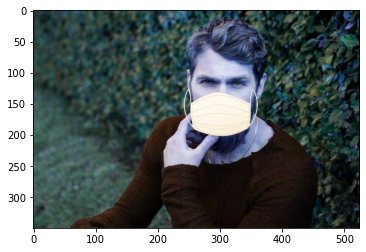

In [6]:
# displaying data as an image
plt.imshow(img);

In [7]:
while True:
    cv2.imshow('Image', img)
    # 27 is ASCII value of escape key in keyboard, so when we press escape the image  window will be closed
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

### Data Preprocessing

In [8]:
import os
import numpy as np
from keras.utils import np_utils

In [10]:
data_path = 'dataset'
categories = os.listdir(data_path)
labels = [i for i in  range(len(catogories))]
label_dict = dict(zip(catogories, labels))

data = []
target = []

for category in categories:
    
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        
        try:
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (100, 100))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:', e)

data = np.array(data)/255.0
data = np.reshape(data, (data.shape[0], 100, 100, 1))
target = np.array(target)

new_target=np_utils.to_categorical(target)

In [12]:
# saving data as numpy array in npy file format
np.save('data', data)
np.save('target', new_target)